In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
salary and experience with exerience in x-axis and salary in y axis.
a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph
between beta and mean squared error(MSE) for each case.
b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between
beta and mean squared error(MSE).
c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between
beta and mean squared error(MSE).
d. Use the scikit learn and compare the results of MSE.

In [2]:
df=pd.read_csv('salary.csv')

In [3]:
x=df['experience'].values
y=df['salary'].values

In [4]:
def cost(y_hat,y):
    return np.sqrt(np.mean((y_hat-y)**2))

In [5]:
def SLR(x,y):
    X = np.array([[len(x),np.sum(x)],[np.sum(x),np.sum(x**2)]])
    Y = np.array([np.sum(y),np.sum(x*y)])

    B0,B1 = np.dot(np.linalg.inv(X),Y)
    return B0,B1

In [6]:
b0,b1=SLR(x,y)
print(f'b0: {b0}, b1: {b1}')

b0: -0.035638610947623606, b1: 1.5670982931135957


In [7]:
y_pred=b1*x+b0
print(f'RMSE = {cost(y_pred,y)}')

RMSE = 0.4833912577848359


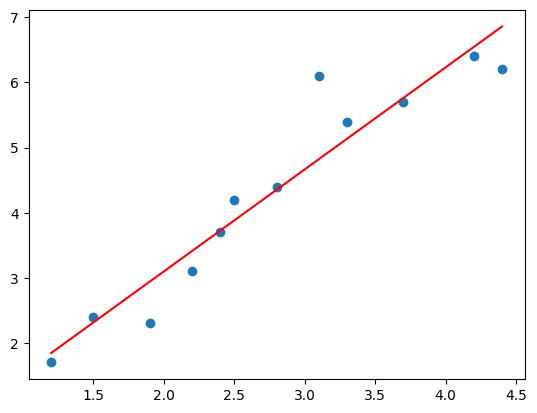

In [8]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')

In [9]:
b1=1.1
b0=[0.1,1.5,0.8]

In [10]:
y_pred=[]
mse=[]
for b in b0:
    y_pred.append(b1*x+b)
    mse.append(cost(np.array(y_pred),y))

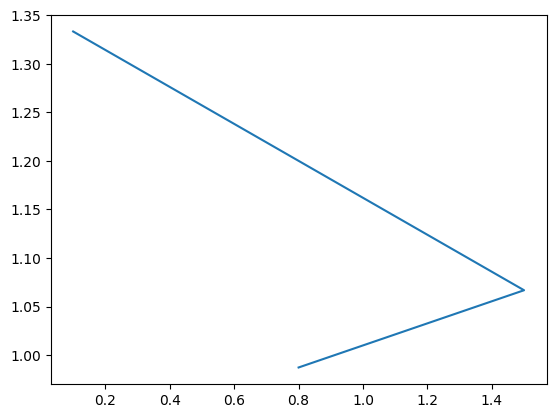

In [11]:
plt.plot(b0,mse)

In [12]:
y_pred=[]
mse=[]
b0=np.arange(0,1.5,0.01)
for b in b0:
    y_pred.append(b1*x+b)
    mse.append(cost(y_pred,y))

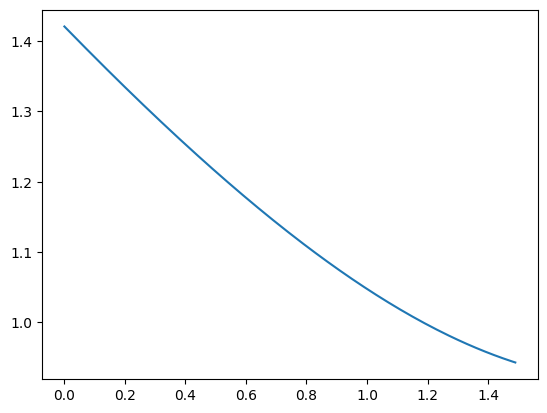

In [13]:
plt.plot(b0,mse)

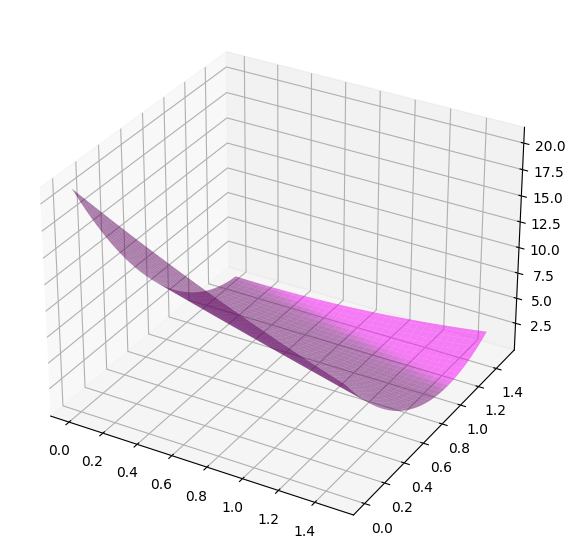

In [14]:
b0 = np.arange(0, 1.51, 0.01)
b1 = np.arange(0, 1.51, 0.01)

mse_c = []
for i in b1:
    z = []
    for j in b0:
        y_pred = i*x + j
        z.append(np.mean(((i*x + j) - y) ** 2))
    mse_c.append(z)
mse_c = np.array(mse_c)


B0, B1 = np.meshgrid(b0, b1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B0, B1, mse_c, color='magenta', alpha=0.5)
plt.show()


### sklearn

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x.reshape(-1,1),y)
b0=reg.intercept_
b1=reg.coef_

y_pred=b1*x+b0
print(f'RMSE = {cost(y_pred,y)}')

RMSE = 0.4833912577848358


2. Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1
and error for 60 iterations of 5 epochs.
a. Plot the graph of log loss/error versus iteration.
b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.
c. Plot the graph between beta (X-axis) and log loss/ error (Y-axis) using scikit learn and your approach
separately.
d. Plot the separate graph of –log(x) ( y=1 case) and –log(1-x) (y=0 case) and also draw the combined graph of
.both cases.

In [16]:
def SGD(X,Y,epoch,alpha):
    b0=0
    b1=0
    costs=[]
    grad=[]
    for iter in range(epoch):
        for i in range(len(X)):
            y_hat=b0+b1*X[i]
            costs.append(cost(y_hat,Y[i]))
            b0=b0-alpha*(y_hat-Y[i])
            b1=b1-alpha*(y_hat-Y[i])*X[i]
            grad.append(b1)
    return b0,b1,costs,grad

In [17]:
epoch=5
alpha=0.0025
b0,b1,costs,grad=SGD(x,y,epoch,alpha)

print(f'b0: {b0}, b1: {b1} RMSE: {costs[-1]}')

b0: 0.35088385820197543, b1: 1.0761434022855567 RMSE: 1.1738332859989198


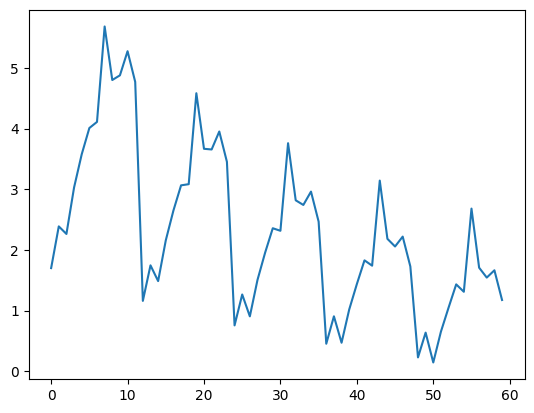

In [18]:
plt.plot(range(len(costs)),costs)

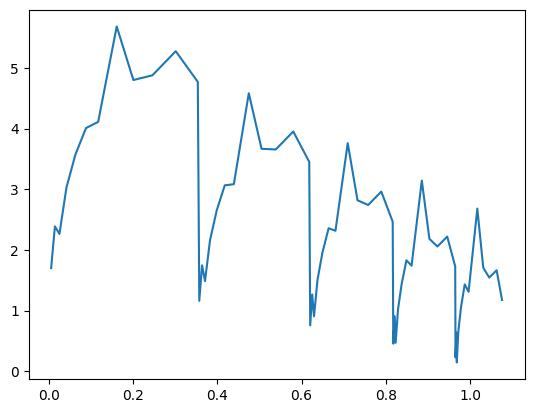

In [19]:
plt.plot(grad,costs)

### sklearn

In [20]:
from sklearn.linear_model import SGDRegressor

reg=SGDRegressor()

costs=[]
grad=[]
for i in range(60):
    reg.partial_fit(x.reshape(-1,1),y)
    b0=reg.intercept_[0]
    b1=reg.coef_[0]
    grad.append(b1)
    y_pred=b1*x+b0
    costs.append(cost(y_pred,y))

print(f'b0: {b0}, b1: {b1} RMSE: {costs[-1]}')

b0: 0.382208509037611, b1: 1.4320925130696547 RMSE: 0.5028282063839601


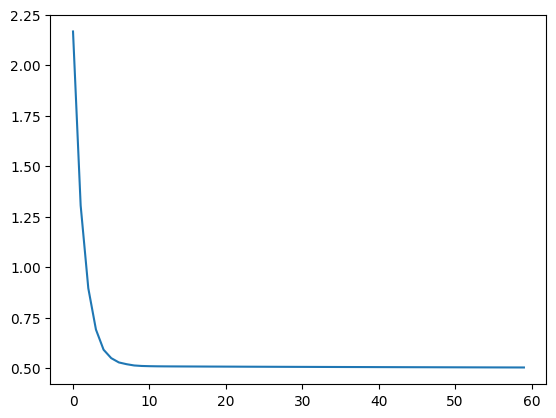

In [21]:
plt.plot(range(len(costs)),costs)

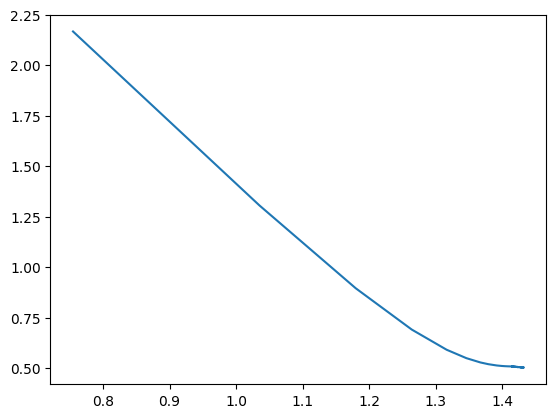

In [22]:
plt.plot(grad,costs)

3. Consider positive and negative slope dataset given below. Apply simple linear regression with gradient
descent and illustrate the difference between slope values for both cases at different iterations. Plot the graph
of slope(x-axis) vs MSE (y-axis) for both case separately.
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5]) # Positive slope
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 8, 6, 4, 2]) # Negative slope

In [23]:
x1 = np.array([1, 2, 4, 3, 5])
y1 = np.array([1, 3, 3, 2, 5]) 

x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([10, 8, 6, 4, 2]) 

In [24]:
epoch=10
alpha=0.01
b0,b1,costs,grad=SGD(x1,y1,epoch,alpha)

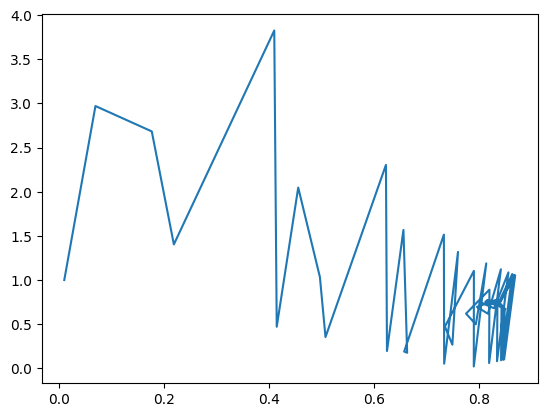

In [25]:
plt.plot(grad,costs)

In [26]:
epoch=15
alpha=0.2
b0,b1,costs,grad=SGD(x2,y2,epoch,alpha)

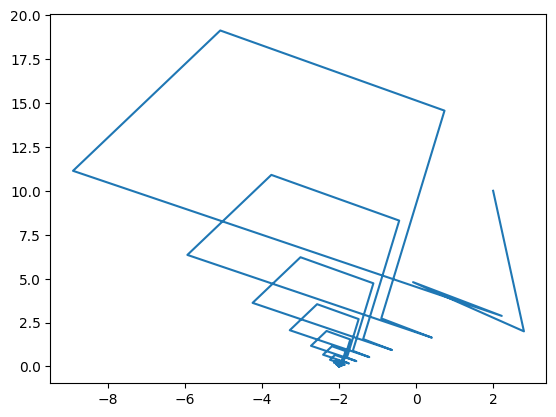

In [27]:
plt.plot(grad,costs)

## Additional Questions

1. Consider positive and negative slope dataset given below. Apply logistic regression with gradient
descent and illustrate the difference between slope values for both cases at different iterations. Plot the
graph of slope(x-axis) vs log-loss (y-axis) for both case separately.
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1]) # Positive slope
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 1, 0, 0, 0]) # Negative slope

In [28]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [29]:
def loss(y_hat,y):
    return (-1/len(y))*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

In [30]:
def logistic(X,Y,epoch,alpha):
    b0=0
    b1=0
    costs=[]
    grad=[]
    for iter in range(epoch):
        y_pred=[]
        for i in range(len(X)):
            z=b0+b1*X[i]
            y_hat=sigmoid(z)
            y_pred.append(y_hat)
            b0=b0-alpha*(y_hat-Y[i])
            b1=b1-alpha*(y_hat-Y[i])*X[i]
            
        cost=loss(np.array(y_pred),Y)
        print(f'Cost at {iter+1}:',cost)
        costs.append(cost)
        grad.append(b1)
        
    return b0,b1,costs,grad

In [31]:
x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([0, 0, 1, 1, 1]) 
x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([1, 1, 0, 0, 0]) 

In [32]:
epoch=10
alpha=0.1
b0,b1,costs,grad=logistic(x1,y1,epoch,alpha)

Cost at 1: 0.6389781395684646
Cost at 2: 0.5714475350559897
Cost at 3: 0.5640049332097856
Cost at 4: 0.5554110185915593
Cost at 5: 0.5456074320031682
Cost at 6: 0.5354795302324017
Cost at 7: 0.5254355519881616
Cost at 8: 0.5156328333856737
Cost at 9: 0.5061255214859748
Cost at 10: 0.49692745399389127


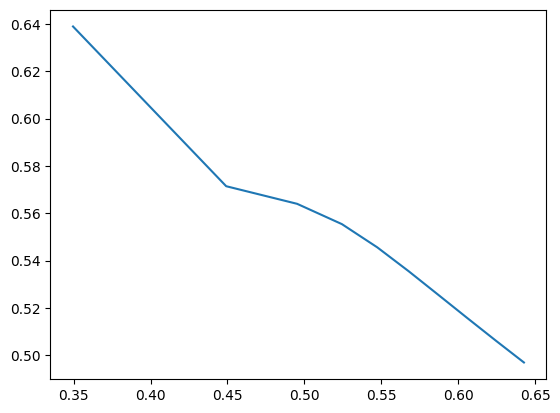

In [33]:
plt.plot(grad,costs)

In [34]:
epoch=10
alpha=0.1
b0,b1,costs,grad=logistic(x2,y2,epoch,alpha)

Cost at 1: 0.6389781395684646
Cost at 2: 0.5714475350559897
Cost at 3: 0.5640049332097856
Cost at 4: 0.5554110185915592
Cost at 5: 0.5456074320031682
Cost at 6: 0.5354795302324018
Cost at 7: 0.5254355519881616
Cost at 8: 0.5156328333856735
Cost at 9: 0.5061255214859748
Cost at 10: 0.4969274539938914


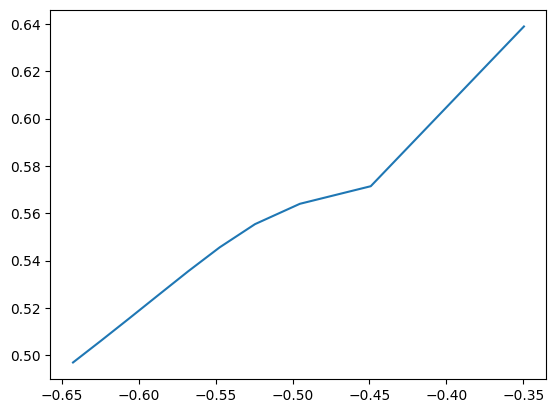

In [35]:
plt.plot(grad,costs)